### Load tensorflow

In [46]:
import tensorflow as tf

In [47]:
tf.__version__

'2.9.2'

### Collect Data
We will use MNIST dataset for this exercise. This dataset contains images of hand written numbers with each image being a black & white picture of size 28x28. We will download the data using tensorflow API. The dataset has 60,000 training examples and 10,000 test examples. Please note that images have already been converted to numpy arrays.

In [48]:
#Download dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [49]:
#Check number of training examples and size of each example
X_train.shape

(60000, 28, 28)

In [50]:
y_train.shape

(60000,)

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [53]:
#Check number of test examples and size of each example
X_test.shape

(10000, 28, 28)

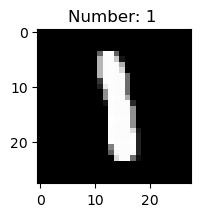

In [54]:
#Let's review the data
import matplotlib.pyplot as plt
import numpy as np

img_num = np.random.randint(0, X_test.shape[0]) #Get a random integer between 0 and number of examples in test dataset
#print(img_num)
plt.figure(figsize=(2,2))
plt.imshow(X_test[img_num].astype('uint8'),cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(y_test[img_num]))
plt.show()

In [55]:
#Number of Unique labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert Output label to multiple values

In [56]:
#Check current label size
y_test[0]

7

In [57]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [58]:
#Now check the label size
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Build the Graph

In [70]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
model.output

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'batch_normalization')>

### Apply Convolutional Layers, MaxPooling

In [60]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 strides=(1,1),
                                 kernel_initializer='he_normal',
                                 activation='relu'))


In [61]:
model.output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>

In [62]:
#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

In [63]:
model.output

<KerasTensor: shape=(None, 12, 12, 64) dtype=float32 (created by layer 'max_pooling2d')>

### Add layers for Classification

In [64]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [65]:
model.output

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [66]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [67]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 24, 24, 64)       2

## Train the model

In [69]:
#Train the model
model.fit(X_train, y_train,          
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=32)

Epoch 1/10
   1/1875 [..............................] - ETA: 13:14 - loss: 3.6715 - accuracy: 0.0625

2024-03-22 19:18:04.231467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.2016 - accuracy: 0.9466

2024-03-22 19:18:29.562904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 28s 15ms/step - loss: 0.2016 - accuracy: 0.9466 - val_loss: 0.0561 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0834 - accuracy: 0.9771 - val_loss: 0.0518 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0627 - accuracy: 0.9826 - val_loss: 0.0601 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0658 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.0411 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0556 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0244 - accuracy: 0.9928 - val_loss: 0.0332 - val_accura

In [ ]:
model.save('mnist_cnn_v1.h5')

In [ ]:
!ls -l

### Model Prediction

In [ ]:
#Load model from disk
model = tf.keras.models.load_model('mnist_cnn_v1.h5')

In [ ]:
model.summary()

In [ ]:
#Predict on first test example
model.predict(testX[0])

In [ ]:
model.input

In [ ]:
testX[0].shape

In [ ]:
np.expand_dims(testX[0], axis=0).shape

In [ ]:
model.output

In [ ]:
prediction = model.predict(np.expand_dims(testX[0], axis=0))

In [ ]:
prediction.shape

In [ ]:
prediction[0]

In [ ]:
np.argmax(prediction[0])

In [ ]:
testY[0]

In [ ]:
#Get a random test image
img_num = np.random.randint(0, testX.shape[0])

#Prediction
prediction = model.predict(np.expand_dims(testX[img_num], axis=0))

#Class with highest probability
predicted_class = np.argmax(prediction[0])

#Show results
plt.imshow(testX[img_num],cmap='gray') #Show the image from test dataset
plt.suptitle('Actual: ' + str(np.argmax(testY[img_num])) + ', Predicted: ' + str(predicted_class))
plt.show()

In [ ]:
Machine A - 0 
Machine B - 1
Machine C - 2
Machine D - 3
Machine E - 4